# Theory
- **Pre-prunning:** In pre-prunning the depth of the decision tree is set before it is created. It is recommended for large datasets.
- **Post-prunning:** In post-prunning the decision tree is pruned after it is created based on the depth parameter. It is recommended for smaller datasets.

Kindly refer to these videos for more information.

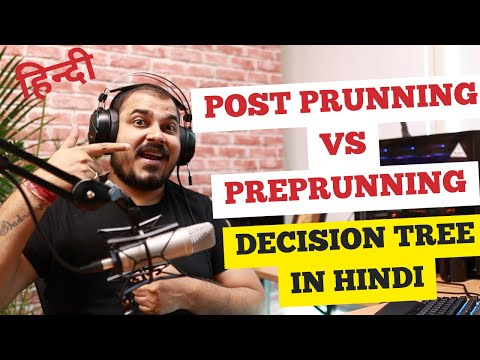

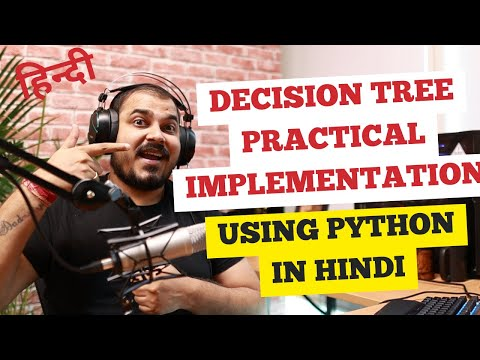

In [1]:
from IPython.display import YouTubeVideo as YTV

videos = ['gcF4wppbDuA', 'OMFQvcBx-Fc']

for video in videos:
    v = YTV(video, height = 370, width = 600)
    display(v)

# Importing the libraries and loading the dataset

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

iris = load_iris()

In [3]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [4]:
import seaborn as sns

iris_data_frame = sns.load_dataset('iris')

In [5]:
iris_data_frame

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [6]:
X = iris_data_frame.iloc[:,:-1]
Y = iris.target

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33, random_state = 42)

In [8]:
from sklearn.tree import DecisionTreeClassifier
treemodel = DecisionTreeClassifier(max_depth = 2)
consume_output = treemodel.fit(X_train, Y_train)

[Text(0.4, 0.8333333333333334, 'x[2] <= 2.45\ngini = 0.666\nsamples = 100\nvalue = [31, 35, 34]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 31\nvalue = [31, 0, 0]'),
 Text(0.6, 0.5, 'x[3] <= 1.75\ngini = 0.5\nsamples = 69\nvalue = [0, 35, 34]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.188\nsamples = 38\nvalue = [0, 34, 4]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.062\nsamples = 31\nvalue = [0, 1, 30]')]

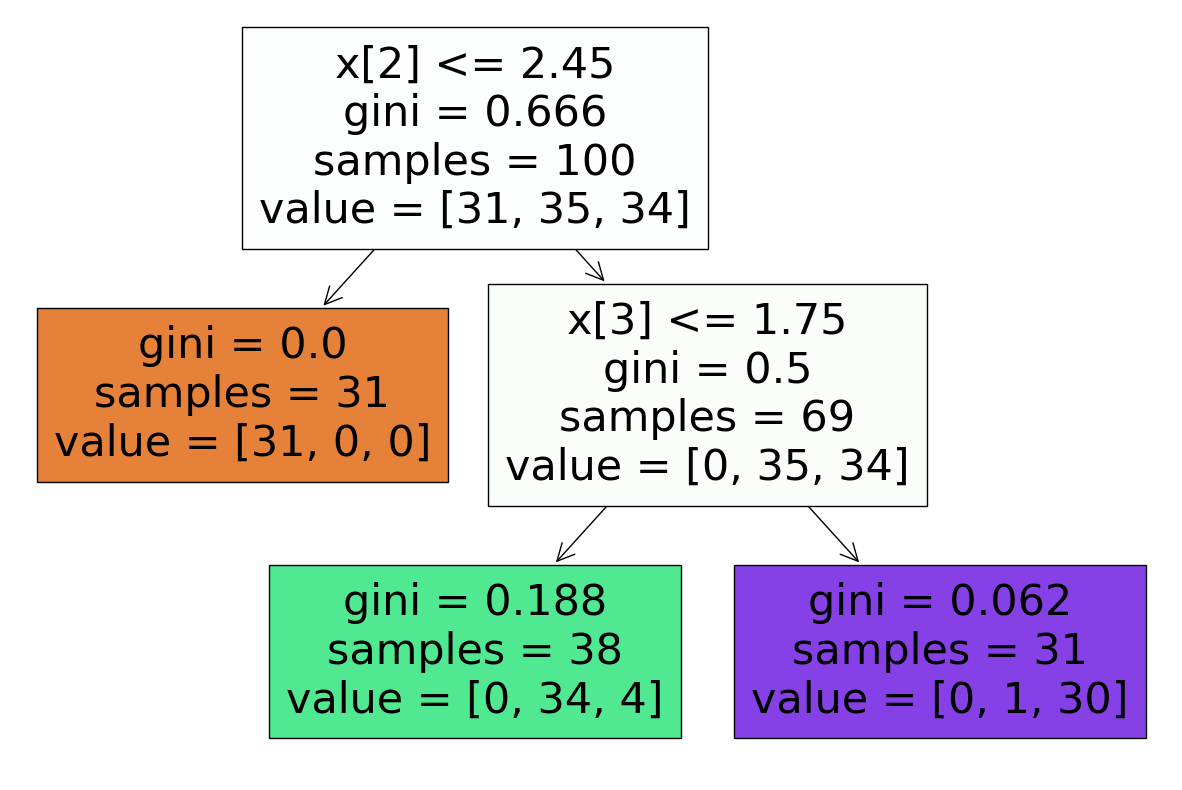

In [9]:
from sklearn import tree
plt.figure(figsize = (15,10))
tree.plot_tree(treemodel,filled = True)

In [10]:
Y_pred = treemodel.predict(X_test)

In [11]:
Y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0, 1, 1, 2, 1, 2])

In [12]:
from sklearn.metrics import accuracy_score,classification_report
accuracy_score(Y_pred, Y_test)

0.98

In [13]:
print(classification_report(Y_pred, Y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.94      0.97        16
           2       0.94      1.00      0.97        15

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



In [14]:
from sklearn.model_selection import GridSearchCV

parameters = {
  'criterion':['gini','entropy','log_loss'],
  'splitter':['best','random'],
  'max_depth':[1,2,3,4,5],
  #'max_features':['auto', 'sqrt', 'log2']
}

treemodel = DecisionTreeClassifier()
cv = GridSearchCV(treemodel, param_grid = parameters, cv=5, scoring='accuracy')

In [15]:
consume_output = cv.fit(X_train, Y_train)

In [16]:
cv.best_params_

{'criterion': 'log_loss', 'max_depth': 5, 'splitter': 'random'}

In [17]:
Y_pred = cv.predict(X_test)
Y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 2, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0, 1, 1, 2, 1, 2])

In [18]:
accuracy_score(Y_pred, Y_test)

0.96

In [19]:
print(classification_report(Y_pred, Y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.93      0.93      0.93        15
           2       0.94      0.94      0.94        16

    accuracy                           0.96        50
   macro avg       0.96      0.96      0.96        50
weighted avg       0.96      0.96      0.96        50



***